In [32]:
!pip install giotto-tda
!pip install gudhi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.4/526.4 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.3 MB/s eta 0:00:00


In [42]:
!pip install scikit-tda
!pip install PyLatex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18101 sha256=998370c6241120c0b8803b63c0fc93481933469e643bd4fa29fedd3cc980b465
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built hopcroftkarp
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 1.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for PyLatex: filename=PyLaTeX-1.4.2-py3-none-any.whl size=43559 sha256=c7727fb2b2bce1500e34792dd58c9d619a874f607a9f1c3acc585ba800592b00
  Stored in directory: /root/.cache/pip/whe

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gtda.time_series import SingleTakensEmbedding, takens_embedding_optimal_parameters
from sklearn.decomposition import PCA
from gtda.plotting import plot_point_cloud
import ripser
import persim
plt.rcParams.update(plt.rcParamsDefault)

In [4]:
rain = pd.read_csv("rainfall.csv")
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               54 non-null     object 
 1   rainfall           53 non-null     float64
 2   temperature        53 non-null     float64
 3   humidity           53 non-null     float64
 4   wind_speed         53 non-null     float64
 5   weather_condition  53 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.7+ KB


In [5]:
rain.head()

,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy


In [7]:
rain.tail()

,date,rainfall,temperature,humidity,wind_speed,weather_condition
49,2022-02-19,17.3,15.9,83.0,8.6,Rainy
50,2022-02-20,9.6,18.6,71.0,6.7,Rainy
51,2022-02-21,0.0,21.3,55.0,5.1,Sunny
52,2022-02-22,7.4,16.8,77.0,8.9,Rainy
53,Co,NaN,NaN,NaN,NaN,NaN


In [8]:
# La columna weather_condition es redundante con rainfall, por lo que la voy a eliminar.
# Se elimina la última fila ya que es la única con NA

df = rain.drop(rain.index[-1]).drop(rain.columns[-1], axis=1)

In [10]:
df.describe()

,rainfall,temperature,humidity,wind_speed
count,53.000000,53.000000,53.000000,53.000000
mean,9.049057,17.950943,69.245283,6.403774
std,6.712521,2.500663,11.969361,2.209069
min,0.000000,13.900000,44.000000,2.100000
25%,3.900000,16.100000,62.000000,4.700000
50%,8.300000,17.800000,72.000000,6.700000
75%,14.800000,19.400000,78.000000,8.300000
max,21.800000,23.400000,89.000000,10.500000


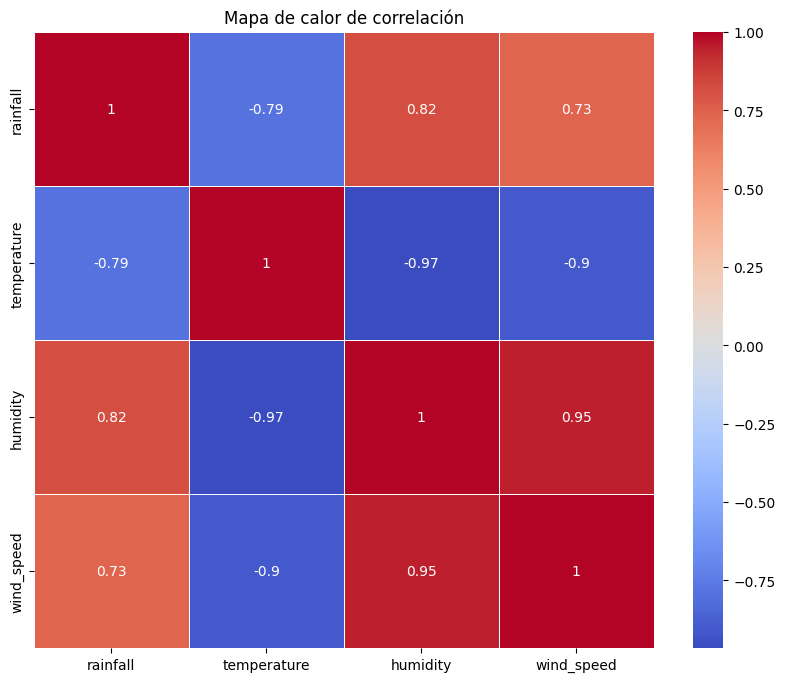

In [13]:
df_sinfecha = df.drop(df.columns[0], axis=1)
matriz_correlacion = df_sinfecha.corr()

# Crear un mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de correlación')
plt.show()

Parece que la humedad es la que más correlación tiene con la lluvia, lo cual tiene sentido. La temperatura y la velocidad del viento también están un poco relacionadas.

In [14]:
df['date'] = pd.to_datetime(df['date'])

# Indexear por fecha
df.set_index('date', inplace=True)

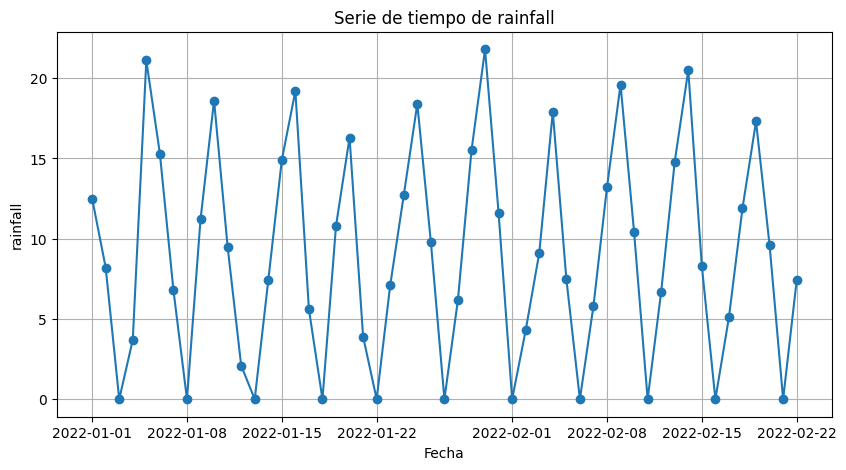

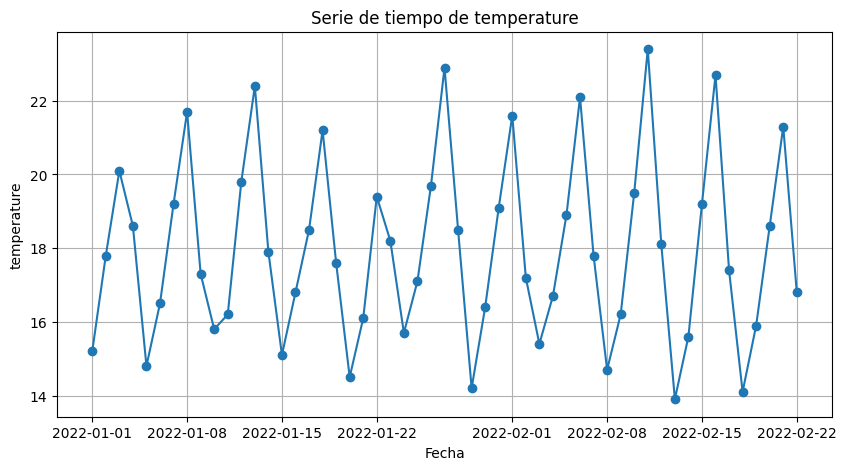

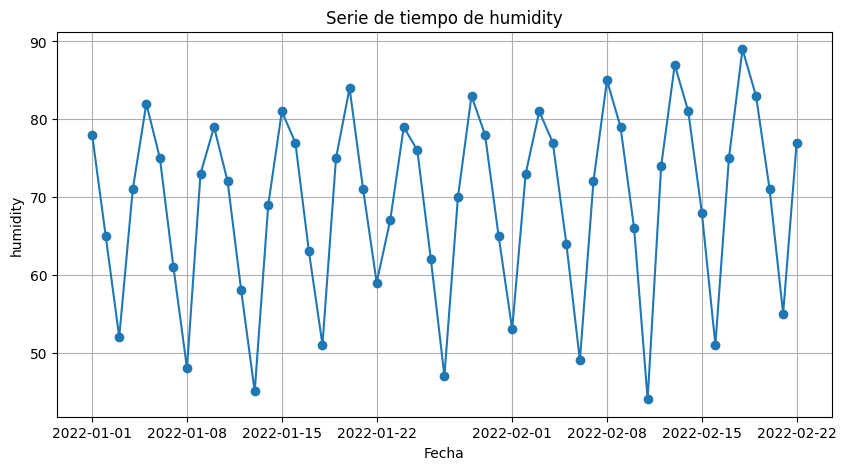

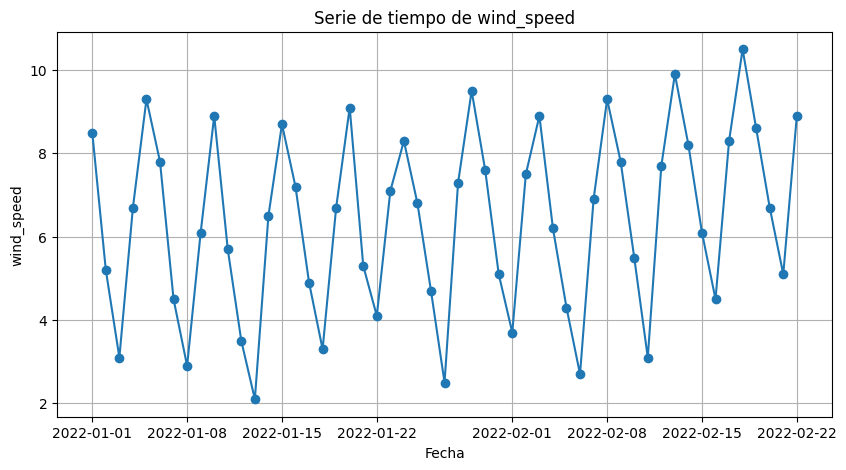

In [15]:
# Graficar cada serie de tiempo
for columna in df:
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[columna], marker='o', linestyle='-')
    plt.title(f'Serie de tiempo de {columna}')
    plt.xlabel('Fecha')
    plt.ylabel(columna)
    plt.grid(True)
    plt.show()

Si parece haber cierta periodicidad en el nivel de lluvia/precipitación, lo que indica que el análisis podría ser valioso. Dado que los datos tienen rangos muy diferentes, los voy a normalizar.

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_std=True)
normalized_df = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_df, columns=df.columns)
# Indexear por fecha
normalized_df.set_index(df.index, inplace=True)

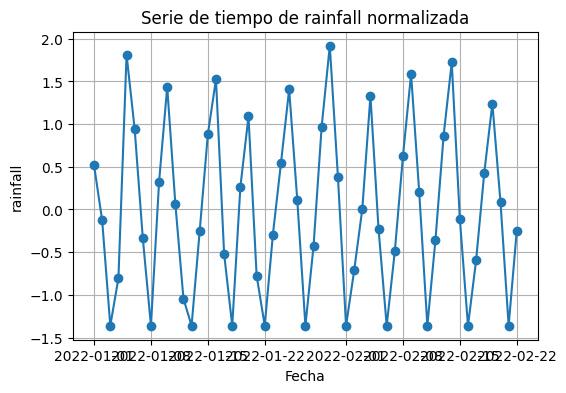

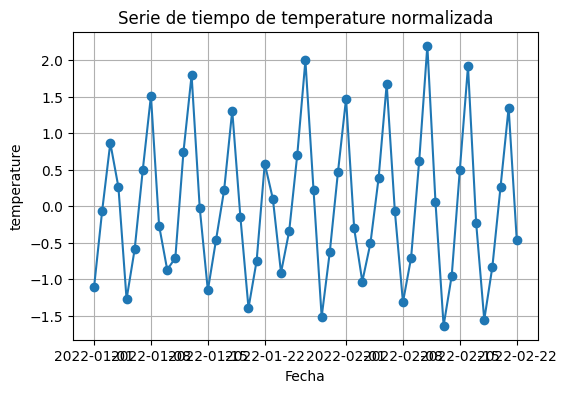

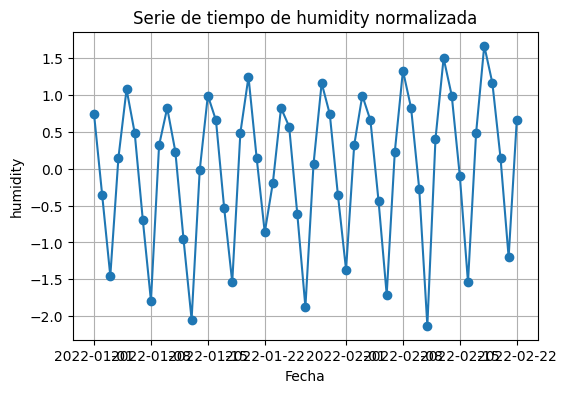

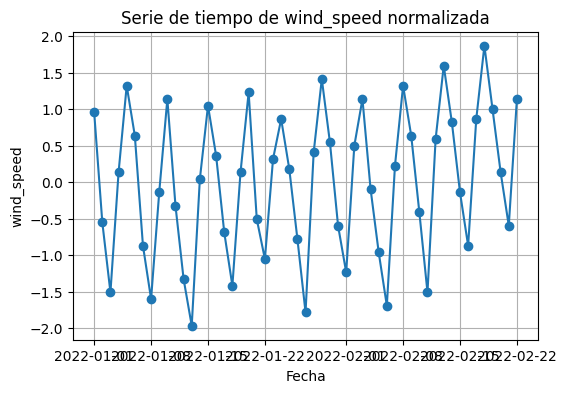

In [50]:
# Graficar cada serie de tiempo
for columna in normalized_df:
    plt.figure(figsize=(6, 4))
    plt.plot(normalized_df.index, normalized_df[columna], marker='o', linestyle='-')
    plt.title(f'Serie de tiempo de {columna} normalizada')
    plt.xlabel('Fecha')
    plt.ylabel(columna)
    plt.grid(True)
    plt.show()

Dado que se están buscando ciclos. se debe realizar un "embedded" de Takens de una serie temporal unidimensional. Primerlo, hay que buscar los parámetros óptimos.

In [35]:
rainfall_normalized = normalized_df["rainfall"]
max_periodic_dimension=6
max_periodic_time_delay=7
stride=1
tau,d= takens_embedding_optimal_parameters(rainfall_normalized, max_periodic_dimension, max_periodic_time_delay, stride)
print('Optimal time delay: ', tau,'\nOptimal dimension: ', d)

Optimal time delay:  6 
Optimal dimension:  3


In [41]:
embedder_periodic = SingleTakensEmbedding(parameters_type="search",time_delay=max_periodic_time_delay,
    dimension=max_periodic_dimension)
rainfall_normalized_embedded = embedder_periodic.fit_transform(rainfall_normalized)
print("El delay encontrado es ", embedder_periodic.time_delay_)
print("El delay encontrado es ", embedder_periodic.dimension_)


print(f"Shape of embedded time series: {rainfall_normalized_embedded.shape}")

pca = PCA(n_components=3)
rainfall_normalized_embedded_pca = pca.fit_transform(rainfall_normalized_embedded)
plot_point_cloud(rainfall_normalized_embedded_pca)

El delay encontrado es  7
El delay encontrado es  4
Shape of embedded time series: (32, 4)


In [44]:
ripserperiod=ripser.ripser(rainfall_normalized_embedded)['dgms']

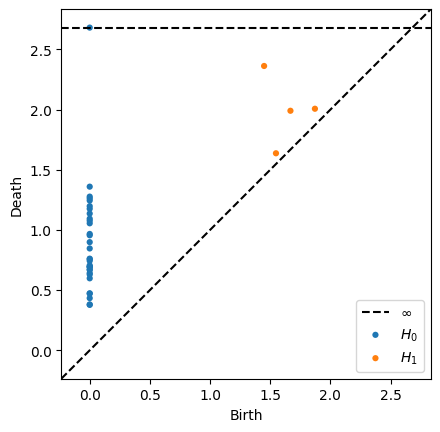

In [47]:
persim.plot_diagrams(
    ripserperiod,
    show=True
)

# Base para realizar el Mapper

In [53]:
!pip install kmapper
!pip install tadasets

In [70]:
import kmapper as km
import sklearn
import numpy as np

In [57]:
data_map = normalized_df.to_numpy()

In [79]:
# Inicializar: mapper
mapper = km.KeplerMapper(verbose=1)

KeplerMapper(verbose=1)


In [80]:
# Generar: proyección sobre coordenadas
projected_data = mapper.fit_transform(data_map, projection=[1, 2,3]) # X-Y axis

..Composing projection pipeline of length 1:
	Projections: [1, 2, 3]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (53, 4)

..Projecting data using: [1, 2, 3]

..Scaling with: MinMaxScaler()



In [81]:
# Generar: cubierta | segmentar méxico en 5
covering = km.Cover(n_cubes=5, perc_overlap=0.2)

In [84]:
# Generar: grafo
graph = mapper.map(projected_data, data_map, clusterer=sklearn.cluster.KMeans(n_clusters=4), cover=covering)

Mapping on data shaped (53, 4) using lens shaped (53, 3)

Creating 125 hypercubes.

Created 54 edges and 56 nodes in 0:00:00.153195.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [85]:
mapper.visualize(graph, path_html="Rainfall.html",
                 title="Mapeo de color Lluvia",
                 color_values = data_map[:,0],
                 color_function_name = "Lluvia",
                 node_color_function=np.array(['average','std','sum','max','min']))

Wrote visualization to: Rainfall.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Mapeo de color Lluvia | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  fo